In [8]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None




In [30]:
df = pd.read_csv(r'C:\Users\Manis\Downloads\Global YouTube Statistics.csv')

In [32]:
#lets Look at the data
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [36]:
#let's see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

rank - 0.0%
Youtuber - 0.0%
subscribers - 0.0%
video views - 0.0%
category - 0.04623115577889447%
Title - 0.0%
uploads - 0.0%
Country - 0.12261306532663317%
Abbreviation - 0.12261306532663317%
channel_type - 0.03015075376884422%
video_views_rank - 0.0010050251256281408%
country_rank - 0.11658291457286432%
channel_type_rank - 0.033165829145728645%
video_views_for_the_last_30_days - 0.05628140703517588%
lowest_monthly_earnings - 0.0%
highest_monthly_earnings - 0.0%
lowest_yearly_earnings - 0.0%
highest_yearly_earnings - 0.0%
subscribers_for_last_30_days - 0.33869346733668343%
created_year - 0.005025125628140704%
created_month - 0.005025125628140704%
created_date - 0.005025125628140704%
Gross tertiary education enrollment (%) - 0.12361809045226131%
Population - 0.12361809045226131%
Unemployment rate - 0.12361809045226131%
Urban_population - 0.12361809045226131%
Latitude - 0.12361809045226131%
Longitude - 0.12361809045226131%


In [38]:
# Data types for our columns
df.dtypes


rank                                         int64
Youtuber                                    object
subscribers                                  int64
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days               float64
created_year                   

In [58]:
#change data type of columns

df['subscribers'] = df['subscribers'].astype('int64')
df['uploads'] = df['uploads'].astype('int64')

In [60]:
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por A�,12300000,9.029610e+09,Sports,Natan por A�,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [62]:
#create correct youtuber column

df['Youtubercorrect'] = df['Youtuber'].astype(str).str[:4]
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Youtubercorrect
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,T-Se
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,YouT
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,MrBe
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,Coco
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,SET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por A�,12300000,9.029610e+09,Sports,Natan por A�,1200,Brazil,BR,Entertainment,...,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280,Nata
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,Free
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973,Pand
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501,RobT


In [74]:
df.sort_values(by=['Urban_population'], inplace=False, ascending=False)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Youtubercorrect
507,508,��������� Liziqi,17600000,2.977742e+09,Howto & Style,��������� Liziqi,128,China,CN,Howto,...,2017.0,Aug,22.0,50.6,1.397715e+09,4.32,842933962.0,35.861660,104.195397,����
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,T-Se
420,421,DLS News,19400000,2.255543e+09,News & Politics,DLS News,4750,India,IN,News,...,2017.0,Jul,5.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,DLS
424,425,Manoj parihar,19300000,2.642281e+08,NaN,Manoj parihar,335,India,IN,Howto,...,2021.0,Mar,2.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,Mano
428,429,Sonotek,19200000,7.590582e+09,Entertainment,Sonotek,8285,India,IN,Music,...,2011.0,Jan,11.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,Sono
435,436,Wow Kidz Action,19000000,8.281724e+09,Film & Animation,Wow Kidz Action,1525,India,IN,Entertainment,...,2017.0,Nov,8.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,Wow
448,449,Triggered Insaan,18800000,3.276892e+09,Comedy,Triggered Insaan,304,India,IN,People,...,2014.0,Jul,17.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,Trig
451,452,Shemaroo Comedy,18600000,6.047584e+09,Entertainment,Shemaroo Comedy,4487,India,IN,Comedy,...,2007.0,Jan,31.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,Shem
493,494,Priyal Kukreja,17800000,1.105795e+10,People & Blogs,Priyal Kukreja,772,India,IN,People,...,2021.0,Apr,23.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,Priy
498,499,jaanvi patel,17700000,7.912733e+09,People & Blogs,jaanvi patel,512,India,IN,People,...,2018.0,Jul,18.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,jaan


In [72]:
pd.set_option('display.max_rows',None)

In [78]:
#Drop any duplicates

#df['Youtuber'].drop_duplicates().sort_values(ascending=False)
df.drop_duplicates()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Youtubercorrect
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,T-Se
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,YouT
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,MrBe
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,Coco
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,SET
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN,Musi
6,7,��� Kids Diana Show,112000000,9.324704e+10,People & Blogs,��� Kids Diana Show,1111,United States,US,Entertainment,...,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,���
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924,PewD
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756,Like
9,10,Vlad and Niki,99800000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,Vlad


In [80]:
# youtuber highCorrelation
#subsciber  HIgh Correlation


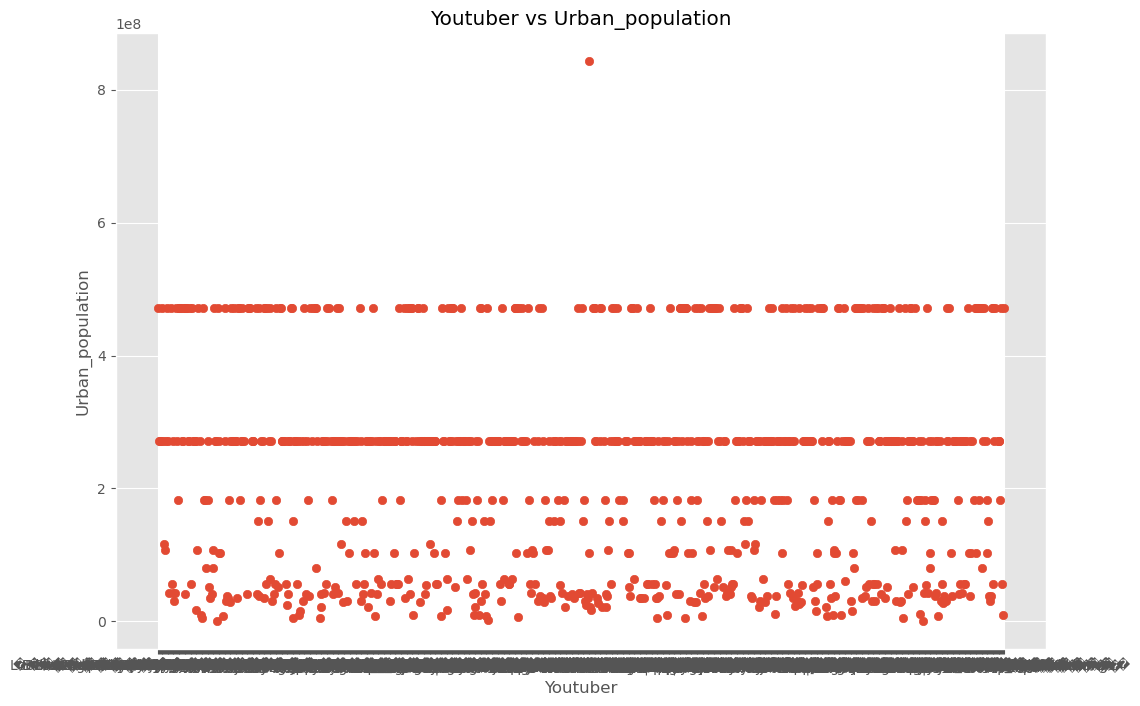

In [86]:
#scatter plot with youtuber vs urban_population

plt.scatter(x=df['Youtuber'], y=df['Urban_population'])

plt.title('Youtuber vs Urban_population')

plt.xlabel('Youtuber')

plt.ylabel('Urban_population')
plt.show()

In [100]:
print(df['Urban_population'].value_counts())

Series([], Name: count, dtype: int64)


C:\Users\Manis\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Manis\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


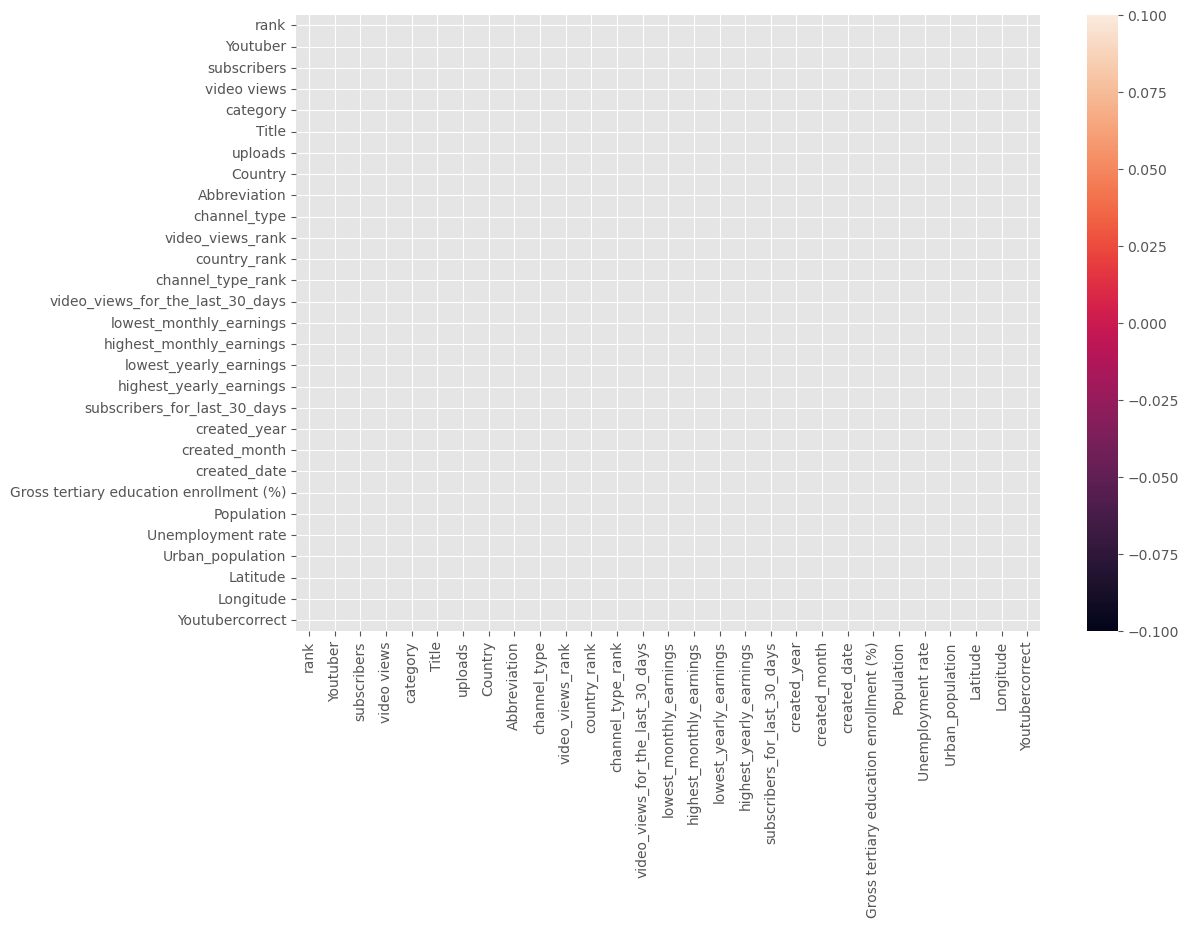

In [110]:
#hight correlation between y and s
# I was right
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.show ()

In [114]:
# Looks at Comapany
df.head()


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Youtubercorrect


In [132]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'float64'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Youtubercorrect


C:\Users\Manis\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Manis\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


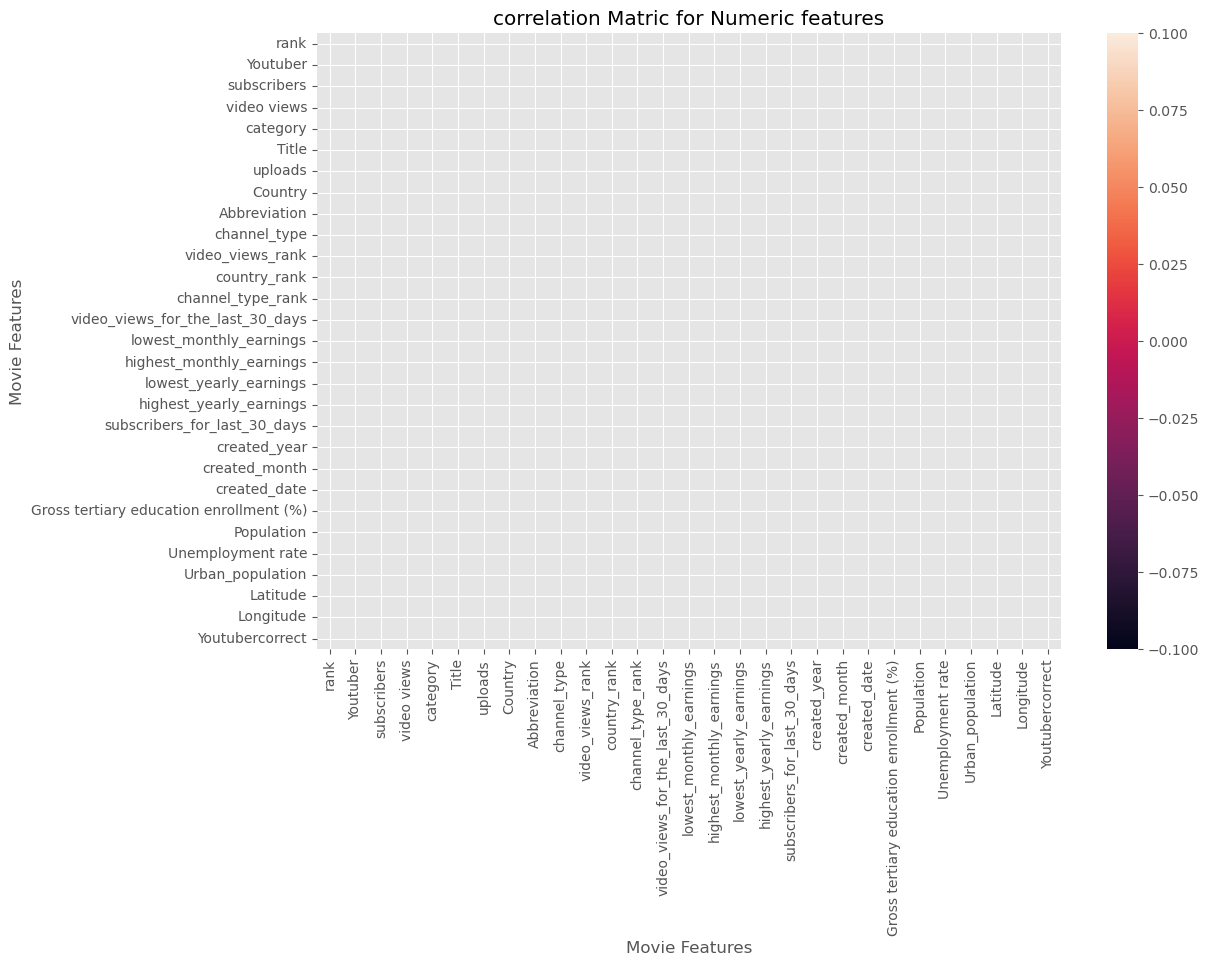

In [140]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation Matric for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [146]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

rank                                     rank                                      NaN
                                         Youtuber                                  NaN
                                         subscribers                               NaN
                                         video views                               NaN
                                         category                                  NaN
                                         Title                                     NaN
                                         uploads                                   NaN
                                         Country                                   NaN
                                         Abbreviation                              NaN
                                         channel_type                              NaN
                                         video_views_rank                          NaN
                                         co

In [150]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

rank                                     rank                                      NaN
                                         Youtuber                                  NaN
                                         subscribers                               NaN
                                         video views                               NaN
                                         category                                  NaN
                                         Title                                     NaN
                                         uploads                                   NaN
                                         Country                                   NaN
                                         Abbreviation                              NaN
                                         channel_type                              NaN
                                         video_views_rank                          NaN
                                         co

In [152]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

Series([], dtype: float64)

In [ ]:
#votes and subscriber have the highest correlation to youtuber earning
